In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load the dataset
csv_filename = "Hierarchical_FL_Results.csv"  # Ensure the correct path

df = pd.read_csv(csv_filename)

# Convert K1 to categorical to maintain order
df["K1"] = pd.Categorical(df["K1"], categories=sorted(df["K1"].unique(), key=lambda x: int(x)), ordered=True)


# Define a consistent color palette with the correct number of categories
palette_k1 = sns.color_palette("Blues", df["K1_Allocation"].nunique())
palette_k2 = sns.color_palette("Greens", df["K2"].nunique())

 ### Plot 1: Heatmap to identify optimal K1 and K2 for accuracy (MNIST DataSet)

/tmp/ipykernel_677992/1413779535.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = subset.pivot_table(index="K1", columns="K2", values="Accuracy")


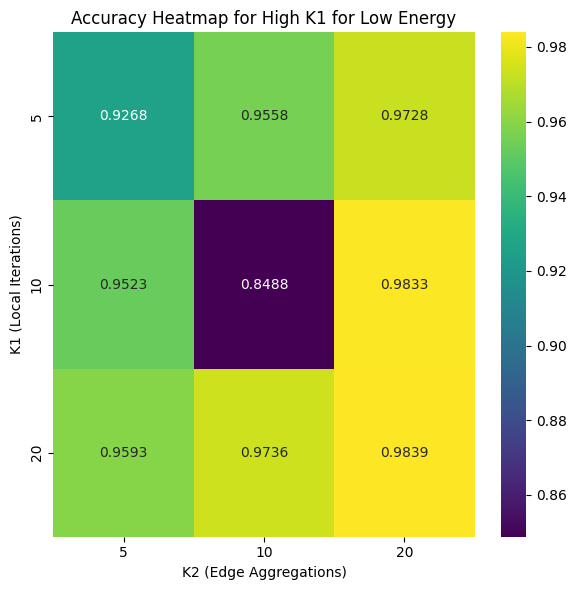

/tmp/ipykernel_677992/1413779535.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = subset.pivot_table(index="K1", columns="K2", values="Accuracy")


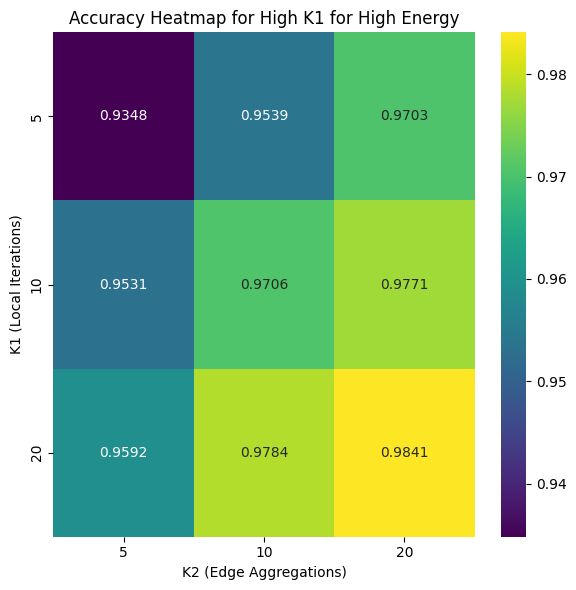

/tmp/ipykernel_677992/1413779535.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = subset.pivot_table(index="K1", columns="K2", values="Accuracy")


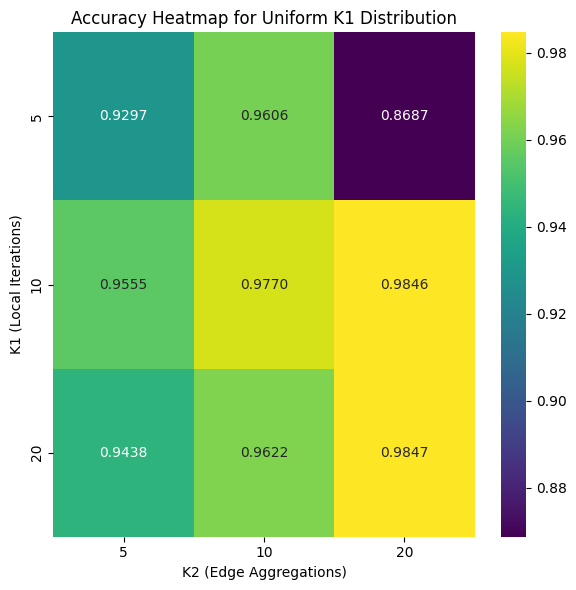

In [79]:
k1_allocations = df["K1_Allocation"].unique()
title_map = {
    "reversed": "High K1 for Low Energy",
    "non_reversed": "High K1 for High Energy",
    "uniform": "Uniform K1 Distribution"
}

for k1_allocation in k1_allocations:
    subset = df[df["K1_Allocation"] == k1_allocation]
    pivot_table = subset.pivot_table(index="K1", columns="K2", values="Accuracy")

    fig, ax = plt.subplots(figsize=(6, 6))  # Individual figure size
    sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt=".4f", ax=ax)
    ax.set_title(f"Accuracy Heatmap for {title_map.get(k1_allocation, k1_allocation)}")
    ax.set_xlabel("K2 (Edge Aggregations)")
    ax.set_ylabel("K1 (Local Iterations)")

    plt.tight_layout()
    
    # Define filename based on K1 allocation type
    plot_filename = f"plots/heatmap_accuracy_{k1_allocation}.png"
    plt.savefig(plot_filename, dpi=600, bbox_inches='tight')
    plt.show()

### Plot 2: Accuracy, Training Time, Energy Computation across different K1 allocations

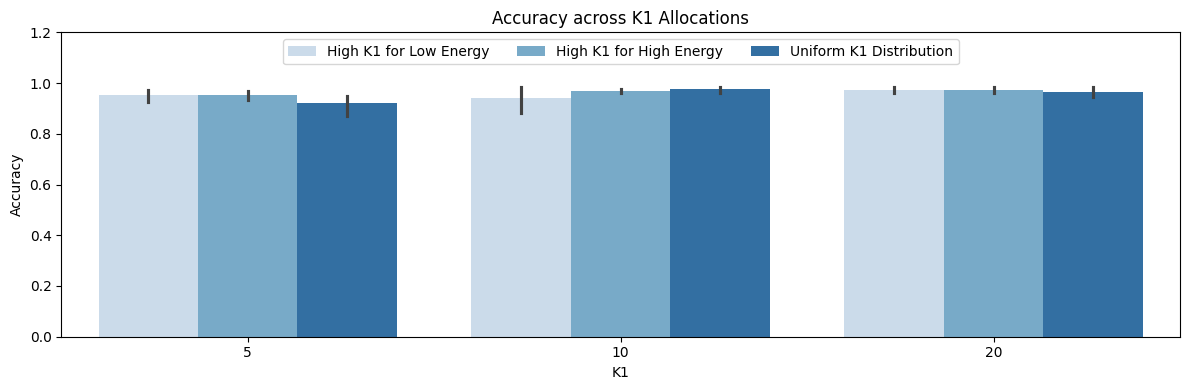

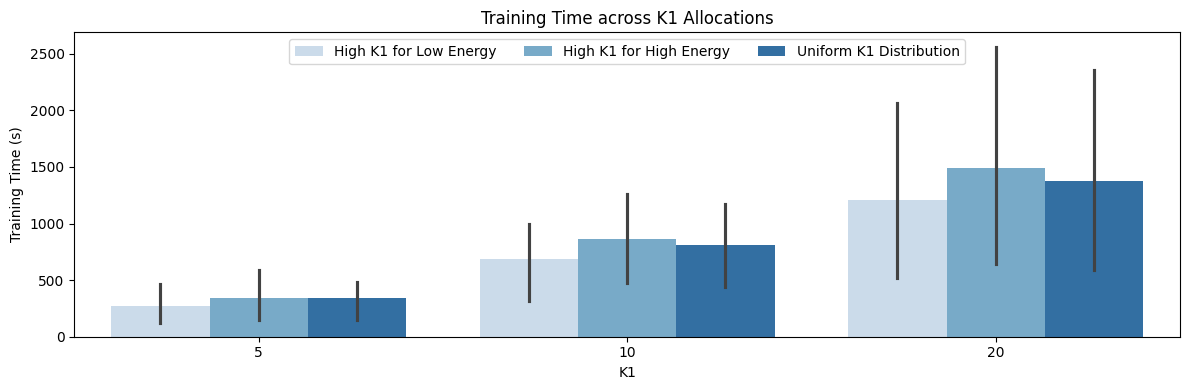

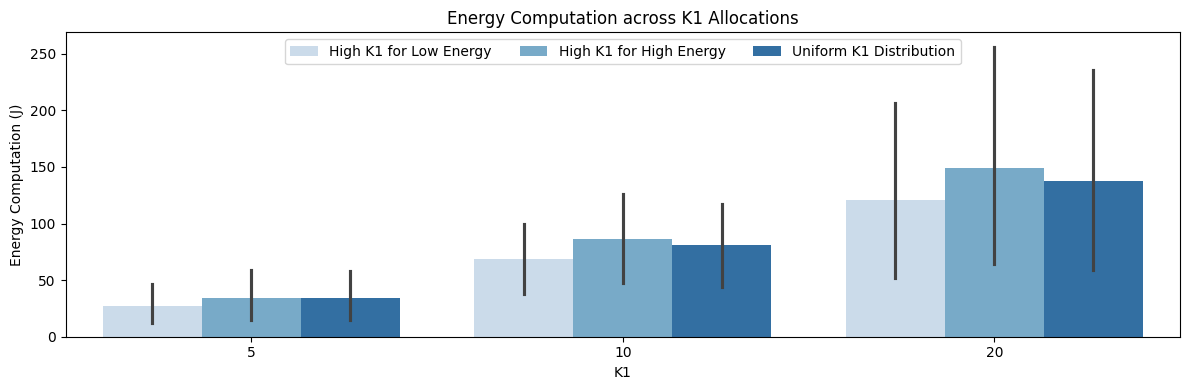

In [80]:
figsize = (12, 4)  # Adjusted figure size for single plots

title_map = {
    "reversed": "High K1 for Low Energy",
    "non_reversed": "High K1 for High Energy",
    "uniform": "Uniform K1 Distribution"
}

# Accuracy Plot
fig, ax = plt.subplots(figsize=figsize)
df["K1_Allocation"] = df["K1_Allocation"].map(title_map)
sns.barplot(x="K1", y="Accuracy", hue="K1_Allocation", data=df, palette=palette_k1, ax=ax)
ax.legend(bbox_to_anchor=(0.5, 1), loc="upper center", ncol=3, frameon=True)
ax.set_ylim(0, 1.2)
ax.set_title("Accuracy across K1 Allocations")
plt.tight_layout()
plt.savefig("plots/accuracy.png", dpi=600, bbox_inches='tight')
plt.show()

# Training Time Plot
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(x="K1", y="Training Time (s)", hue="K1_Allocation", data=df, palette=palette_k1, ax=ax)
ax.legend(bbox_to_anchor=(0.5, 1), loc="upper center", ncol=3, frameon=True)
ax.set_title("Training Time across K1 Allocations")
plt.tight_layout()
plt.savefig("plots/training_time.png", dpi=600, bbox_inches='tight')
plt.show()

# Energy Computation Plot
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(x="K1", y="Energy Computation (J)", hue="K1_Allocation", data=df, palette=palette_k1, ax=ax)
ax.legend(bbox_to_anchor=(0.5, 1), loc="upper center", ncol=3, frameon=True)
ax.set_title("Energy Computation across K1 Allocations")
plt.tight_layout()
plt.savefig("plots/energy_computation.png", dpi=600, bbox_inches='tight')
plt.show()

### Plot 3: Energy Communication changes with K1 and K2

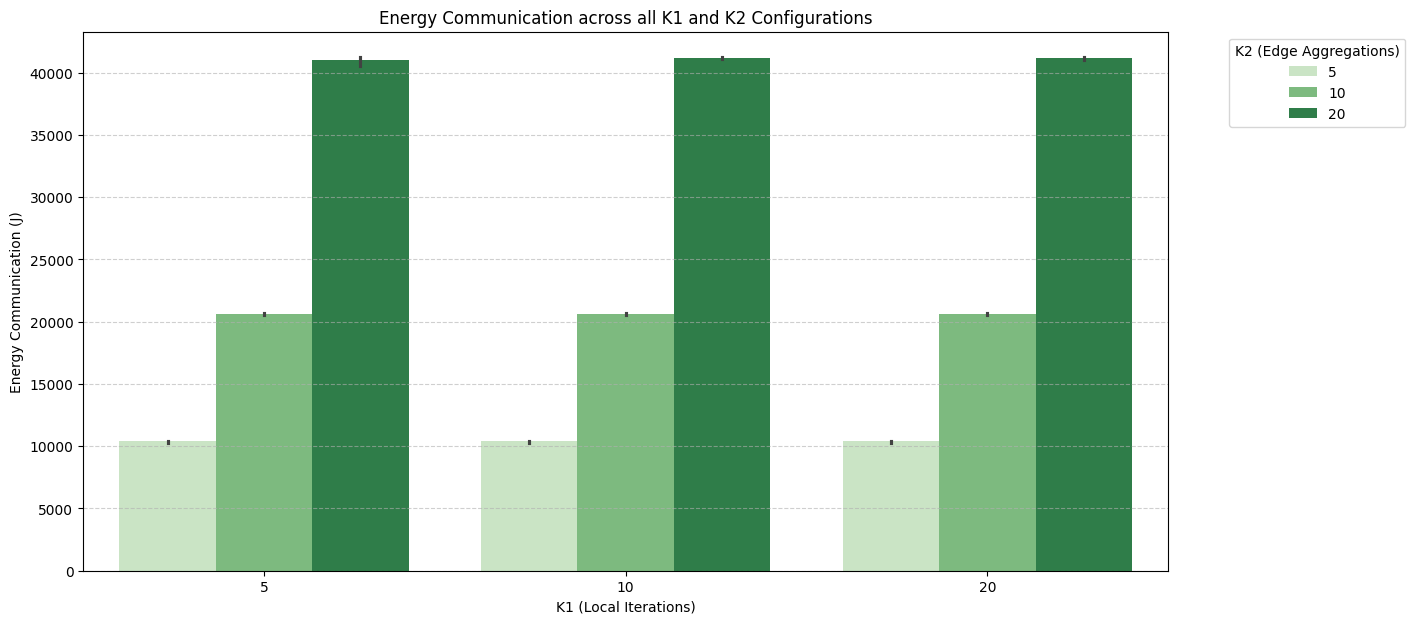

In [50]:
plt.figure(figsize=(14, 7))
sns.barplot(x="K1", y="Energy Communication (J)", hue="K2", data=df, dodge=True, palette=palette_k2)
plt.title("Energy Communication across all K1 and K2 Configurations")
plt.xlabel("K1 (Local Iterations)")
plt.ylabel("Energy Communication (J)")
plt.legend(title="K2 (Edge Aggregations)", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
#plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plot_filename = "plots/energy_communication.png"
plt.savefig(plot_filename, dpi=600, bbox_inches='tight')
plt.show()